In [6]:
# https://github.com/chrisshy/toys/blob/master/ml-gradient-boosting/boosting.ipynb
# here we use 𝑅𝑀𝑆𝐸 as loss evaluation

In [7]:
# from sklearn.metrics import mean_squared_error
# example_MSE = mean_squared_error(example_y_actual, example_y_predicted)
# example_RMSE = math.sqrt(example_MSE)

In [1]:
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor

from xgboost import XGBClassifier, XGBRegressor

In [10]:
class MyGradientBoostingRegressor:
    
    def __init__(self, n_estimators=100, lr=0.1, max_depth=3,min_samples_leaf=2, verbose=False):
        self.n_estimators = n_estimators
        self.lr = lr
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.verbose = verbose
        
        self.estimator_list = None
        self.is_first = True
        self.F = None
        self.score_list = list()
        
    def fit(self, train_X, train_y):
        self.estimator_list = list()
        self.F = np.zeros_like(train_y, dtype=float)
        
        for i in range(1, self.n_estimators + 1):
            # get negative gradients
            neg_grads = train_y - self.F
            
            base = DecisionTreeRegressor(max_depth=self.max_depth,min_samples_leaf=self.min_samples_leaf)
            base.fit(train_X, neg_grads)
            train_preds = base.predict(train_X)
            self.estimator_list.append(base)
            
            if self.is_first:
                self.F = train_preds
                self.is_first = False
            else:
                self.F += self.lr * train_preds
                
#             train_score = r2_score(train_y, self.F)
            train_score = math.sqrt(mean_squared_error(train_y, self.F))
            
            valid_preds = self.predict(valid_X)
            
            valid_score = math.sqrt(mean_squared_error(valid_y, valid_preds))
            
#             valid_score = r2_score(valid_y, valid_preds)
            
            iter_score = dict(iter=i, train_score=train_score, valid_score=valid_score)
            self.score_list.append(iter_score)
            if self.verbose:
                print(iter_score)
                
    def predict(self, X):
        F = np.zeros_like(len(X), dtype=float)
        is_first = True
        for base in self.estimator_list:
            preds = base.predict(X)
            if is_first:
                F = preds
                is_first = False
            else:
                F += self.lr * preds
        return F

In [11]:
def visualize(score_list):
    train_score_list = [i['train_score'] for i in score_list]
    valid_score_list = [i['valid_score'] for i in score_list]
    plt.plot(train_score_list, label='train_score')
    plt.plot(valid_score_list, label='valid_score')
    plt.grid()
    plt.legend()

In [12]:
#let's see what our predictions look like vs the actual 
def ActualvPredictionsGraph(y_test,y_pred,title):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.figure(figsize=(12,3))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.xlabel('Index ')
    plt.ylabel('Pawpularity ')
    plt.title(title,fontdict = {'fontsize' : 15})
    plt.legend(handles = [mpatches.Patch(color='red', label='prediction'),mpatches.Patch(color='blue', label='actual')])
    plt.show()
    return

In [2]:
df = pd.read_csv('D:/Kaggle/PetFinder/train.csv')
X = df.loc[:, ((df.columns != 'Pawpularity')&(df.columns != 'Id'))].copy()
y = df.loc[:, df.columns == 'Pawpularity'].copy()

y = y.values.reshape(-1)

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2,random_state=0)

print(X.shape, y.shape)
print(train_X.shape, train_y.shape)
print(valid_X.shape, valid_y.shape)

(9912, 12) (9912,)
(7929, 12) (7929,)
(1983, 12) (1983,)


In [13]:
model = MyGradientBoostingRegressor(n_estimators=100, max_depth=5,min_samples_leaf=100, verbose=True)
model.fit(train_X, train_y)
print('MyGradientBoostingRegressor train_score: {:.4f} valid_score: {:.4f}'.format(
    math.sqrt(mean_squared_error(train_y, model.predict(train_X))),math.sqrt(mean_squared_error(valid_y, model.predict(valid_X)))))

{'iter': 1, 'train_score': 20.486450394961704, 'valid_score': 20.839656856357863}
{'iter': 2, 'train_score': 20.483582414783243, 'valid_score': 20.837468678523116}
{'iter': 3, 'train_score': 20.4812590564445, 'valid_score': 20.83575057736264}
{'iter': 4, 'train_score': 20.478398868317083, 'valid_score': 20.834224275757673}
{'iter': 5, 'train_score': 20.47671414929376, 'valid_score': 20.83248247790075}
{'iter': 6, 'train_score': 20.47416407385819, 'valid_score': 20.831685062862736}
{'iter': 7, 'train_score': 20.472890551426218, 'valid_score': 20.83174641422052}
{'iter': 8, 'train_score': 20.47164192559171, 'valid_score': 20.83180675823244}
{'iter': 9, 'train_score': 20.470618068307207, 'valid_score': 20.831528163699684}
{'iter': 10, 'train_score': 20.468295433976113, 'valid_score': 20.8314614379633}
{'iter': 11, 'train_score': 20.46688997770981, 'valid_score': 20.83220433999802}
{'iter': 12, 'train_score': 20.4665338302386, 'valid_score': 20.83160043403289}
{'iter': 13, 'train_score': 2

MyGradientBoostingRegressor train_score: 20.4309 valid_score: 20.8249


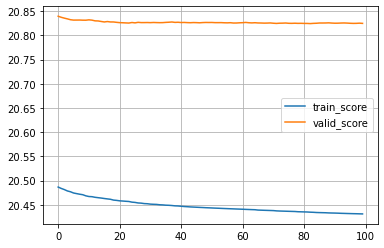

In [41]:
visualize(model.score_list)

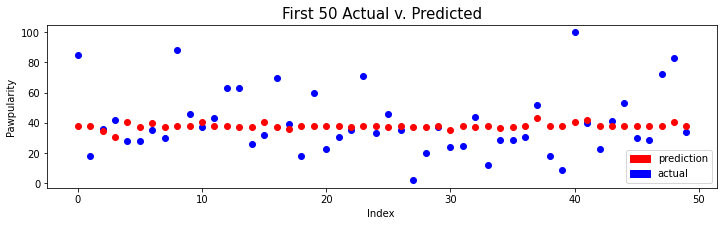

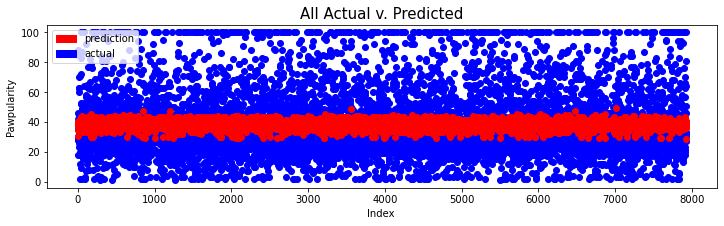

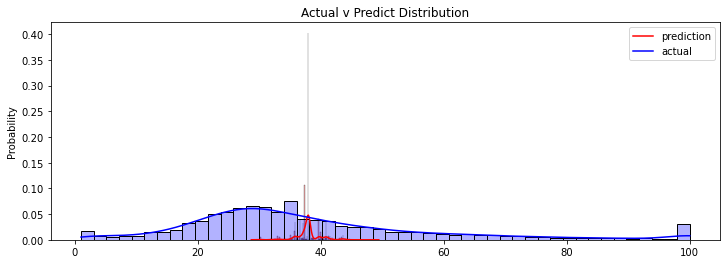

In [42]:
#plot it
ActualvPredictionsGraph(train_y[0:50], model.predict(train_X)[0:50], "First 50 Actual v. Predicted")
ActualvPredictionsGraph(train_y, model.predict(train_X), "All Actual v. Predicted")

#plot actual v predicted in histogram form
plt.figure(figsize=(12,4))
sns.histplot(model.predict(train_X),color='r',alpha=0.3,stat='probability', kde=True)
sns.histplot(train_y,color='b',alpha=0.3,stat='probability', kde=True)
plt.legend(labels=['prediction','actual'])
plt.title('Actual v Predict Distribution')
plt.show()